C:\Users\estef\AppData\Local\Temp\ipykernel_15244\1467764445.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Clase'] = curve_labels


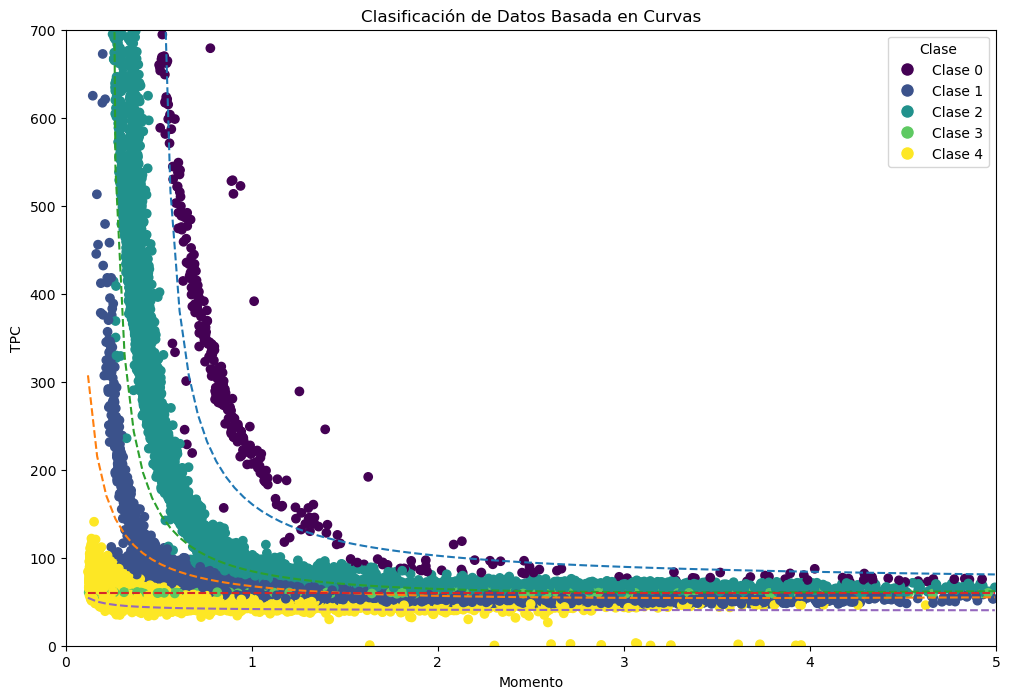

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Plomo_pos')

# Filter data within the desired range in the 'TPC' and 'Momentum' columns
filtered_data = data[(data['TPC'] >= 0) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select relevant columns (TPC and Momentum) after filtering
X = filtered_data[['Momento', 'TPC']]

# Define the curve formula
def curve_formula(x, a, b, c, d, f, h=0):
    if a == 0 and b == 0 and c == 0:
        return d * x + f  # Straight line
    else:
        result = a / (b * (x - h) + c) + d * x + f  # Hyperbola
        result[result < 0] = np.inf  # Ignore negative values by assigning them a very high value
        return result

# Parameters for the curves
params_curves = [
    {'a': 10, 'b': 0.2, 'c': -0.09, 'd': 0, 'f': 70},  # Curve 1
    {'a': 10, 'b': 0.4, 'c': -0.01, 'd': 2, 'f': 40},   # Curve 2
    {'a': 10, 'b': 0.3, 'c': -0.06, 'd': 3, 'f': 40},  # Curve 3
    {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'f': 60},       # Curve 4 (constant straight line at 60)
    {'a': 0.5, 'b': 0.3, 'c': -0.001, 'd': 0, 'f': 40}  # Curve 5
]

# Calculate the curve values for the filtered data
curve_values = np.zeros((len(X), len(params_curves)))
for i, params in enumerate(params_curves):
    curve_values[:, i] = curve_formula(X['Momento'], **params)

# Calculate distances to each curve
distances = np.abs(X['TPC'].values.reshape(-1, 1) - curve_values)

# Specific threshold for curve 4
thresholds = [np.inf] * len(params_curves)  # Initialize all thresholds to infinity
thresholds[3] = 1
thresholds[4] = 200  # Adjust distances according to the thresholds
for i, threshold in enumerate(thresholds):
    distances[:, i] = np.where(distances[:, i] < threshold, distances[:, i], np.inf)

# Classify based on proximity to the curves
curve_labels = np.argmin(distances, axis=1)

# Add class labels to the filtered data
filtered_data['Clase'] = curve_labels

# Export the original dataset with the 'Clase' column added to a CSV file
filtered_data.to_csv('PPC.csv', index=False)

# Visualize the data and the curves
plt.figure(figsize=(12, 8))

# Create a color dictionary for each class
unique_labels = np.unique(curve_labels)
colors = plt.get_cmap('viridis', len(unique_labels))
color_dict = {label: colors(i) for i, label in enumerate(unique_labels) if label != -1}  # Exclude class -1

# Create the scatter plot with colors based on class labels
scatter = plt.scatter(X['Momento'], X['TPC'], c=curve_labels, cmap='viridis', label='Data and Classification')

# Add the curves
momento_range = np.linspace(X['Momento'].min(), X['Momento'].max(), 100)
for i, params in enumerate(params_curves):
    curve_values_i = curve_formula(momento_range, **params)
    plt.plot(momento_range, curve_values_i, linestyle='--', label=f'Curve {i+1}')

# Add a legend with the class names
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[label], markersize=10, label=f'Class {label}') for label in unique_labels if label != -1]
plt.legend(handles=handles, title='Class')

# Configure the visualizatio
plt.title('Data Classification Based on Curves')
plt.xlabel('Momentum')
plt.ylabel('TPC')

# Show the plot
plt.xlim(0, 5)  # Adjust according to the range of your data
plt.ylim(0, 700)
plt.show()

In [119]:
import pandas as pd
df = pd.read_csv("PPC.csv")
df

# #Calculate the frequency of values in the column
frecuencia = df['Clase'].value_counts()

print(frecuencia)

4    95265
1    29315
2    13518
3     9106
0      315
Name: Clase, dtype: int64


C:\Users\estef\AppData\Local\Temp\ipykernel_15244\2068254766.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Clase'] = curve_labels


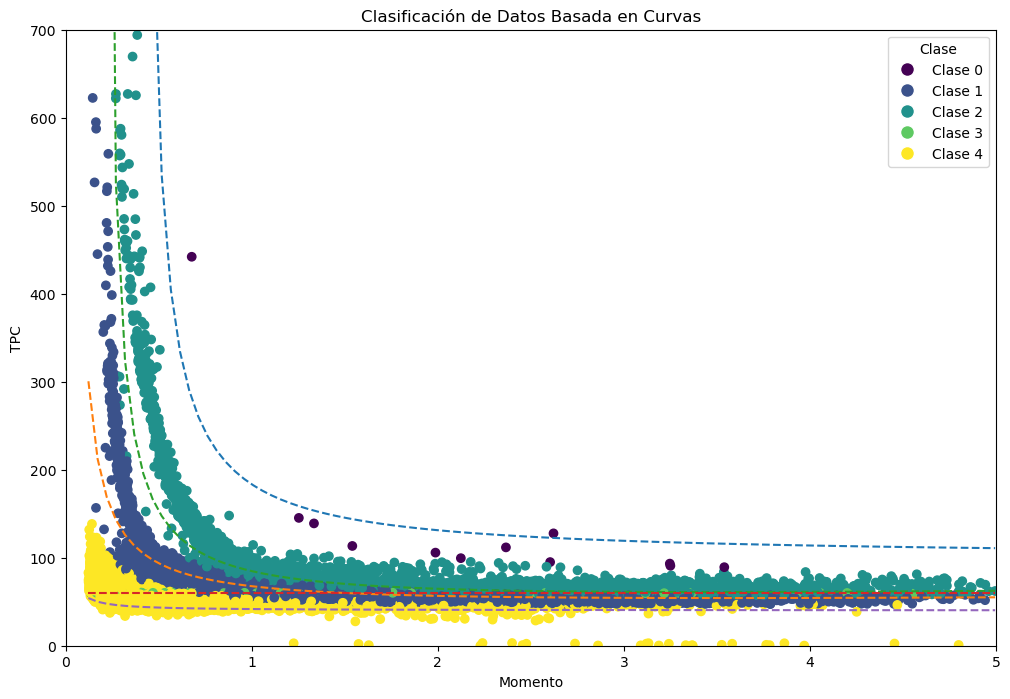

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Plomo_neg')

# Filter data within the desired range in the 'TPC' and 'Momentum' columns
filtered_data = data[(data['TPC'] >= 0) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select relevant columns (TPC and Momentum) after filtering
X = filtered_data[['Momento', 'TPC']]

# Define the curve formula
def curve_formula(x, a, b, c, d, f, h=0):
    if a == 0 and b == 0 and c == 0:
        return d * x + f  # Straight line
    else:
        result = a / (b * (x - h) + c) + d * x + f  # Hyperbola
        result[result < 0] = np.inf  # Ignore negative values by assigning them a very high value
        return result

# Parameters for the curves
params_curves = [
    {'a': 10, 'b': 0.2, 'c': -0.08, 'd': 0, 'f': 100},  # Curve 1
    {'a': 10, 'b': 0.4, 'c': -0.01, 'd': 2, 'f': 40},   # Curve 2
    {'a': 10, 'b': 0.3, 'c': -0.06, 'd': 3.1, 'f': 40},  # Curve 3
    {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'f': 60},       # Curve 4 (constant straight line at 60)
    {'a': 0.5, 'b': 0.3, 'c': -0.001, 'd': 0, 'f': 40}  # Curve 5
]

# Calculate the curve values for the filtered data
curve_values = np.zeros((len(X), len(params_curves)))
for i, params in enumerate(params_curves):
    curve_values[:, i] = curve_formula(X['Momento'], **params)

# Calculate distances to each curve
distances = np.abs(X['TPC'].values.reshape(-1, 1) - curve_values)

# Specific threshold for curve 4
thresholds = [np.inf] * len(params_curves)  # Initialize all thresholds to infinity
thresholds[3] = 0.4
thresholds[1] = 500  # Stricter threshold for curve 4 (straight line)

# Adjust distances according to the thresholds
for i, threshold in enumerate(thresholds):
    distances[:, i] = np.where(distances[:, i] < threshold, distances[:, i], np.inf)

# Classify based on proximity to the curves
curve_labels = np.argmin(distances, axis=1)

# Add class labels to the filtered data
filtered_data['Clase'] = curve_labels

# Export the original dataset with the 'Clase' column added to a CSV file
filtered_data.to_csv('PPN.csv', index=False)

# Visualize the data and the curves
plt.figure(figsize=(12, 8))

# Create a color dictionary for each class
unique_labels = np.unique(curve_labels)
colors = plt.get_cmap('viridis', len(unique_labels))
color_dict = {label: colors(i) for i, label in enumerate(unique_labels) if label != -1}  # Exclude class -1

# Create the scatter plot with colors based on class labels
scatter = plt.scatter(X['Momento'], X['TPC'], c=curve_labels, cmap='viridis', label='Data and Classification')

# Add the curves
momento_range = np.linspace(X['Momento'].min(), X['Momento'].max(), 100)
for i, params in enumerate(params_curves):
    curve_values_i = curve_formula(momento_range, **params)
    plt.plot(momento_range, curve_values_i, linestyle='--', label=f'Curve {i+1}')

# Add a legend with the class names
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[label], markersize=10, label=f'Class {label}') for label in unique_labels if label != -1]
plt.legend(handles=handles, title='Class')

# Configure the visualization
plt.title('Data Classification Based on Curves')
plt.xlabel('Momentum')
plt.ylabel('TPC'


In [82]:
import pandas as pd
df = pd.read_csv("PPN.csv")
df
# Calculate the frequency of values in the column
frecuencia = df['Clase'].value_counts()

print(frecuencia)

4    98103
1    31159
2     6568
3     3584
0       12
Name: Clase, dtype: int64
